In [28]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.8 MB 744.7 kB/s eta 0:00:14
   ---------------------------------------- 0.1/9.8 MB 490.2 kB/s eta 0:00:20
    --------------------------------------- 0.2/9.8 MB 610.0 kB/s eta 0:00:16
    --------------------------------------- 0.2/9.8 MB 762.6 kB/s eta 0:00:13
   - -------------------------------------- 0.3/9.8 MB 842.9 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.8 MB 901.1 kB/s eta 0:00:11
   - -------------------------------------- 0.4/9.8 MB 897.8 kB/s eta 0:00:11
   - -------------------------------------- 0.4/9.8 MB 829.7 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.8 MB 865.6 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/9.8 MB 891.2 kB/s eta 0:00:11


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 939.4 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 952.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 958.4 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [4]:
df = pd.read_csv('ab_stats.csv')

In [5]:
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [6]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [7]:
df[df["av_site visit"] < 0 ].ab_group.value_counts()

ab_group
B    462
A      6
Name: count, dtype: int64

In [8]:
468/23652

0.0197869101978691

In [9]:
df[df["av_site visit"] == 0 ]

,revenue,num_purchases,purchase,ab_group,av_site visit


In [10]:
df_new = df[df["av_site visit"] > 0 ]

In [11]:
df_new.describe()

,revenue,num_purchases,purchase,av_site visit
count,23184.000000,23184.000000,23184.000000,23184.000000
mean,0.326511,0.043780,0.020704,7.188254
std,9.645839,1.089462,0.142394,2.924011
min,0.000000,0.000000,0.000000,0.008679
25%,0.000000,0.000000,0.000000,5.314379
50%,0.000000,0.000000,0.000000,7.068656
75%,0.000000,0.000000,0.000000,8.910900
max,1303.609284,152.000000,1.000000,22.446822


In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23184 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23184 non-null  float64
 1   num_purchases  23184 non-null  int64  
 2   purchase       23184 non-null  int64  
 3   ab_group       23184 non-null  object 
 4   av_site visit  23184 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ MB


In [13]:
df_new = df_new.astype({'num_purchases':np.uint16})

In [16]:
group_a = df_new[df_new['ab_group'] =='A']
group_b = df_new[df_new['ab_group'] =='B']

In [17]:
group_a.describe()

,revenue,num_purchases,purchase,av_site visit
count,11829.000000,11829.000000,11829.000000,11829.000000
mean,0.404667,0.050723,0.021642,6.980379
std,13.136545,1.467883,0.145517,2.004450
min,0.000000,0.000000,0.000000,0.145466
25%,0.000000,0.000000,0.000000,5.657590
50%,0.000000,0.000000,0.000000,6.984166
75%,0.000000,0.000000,0.000000,8.346243
max,1303.609284,152.000000,1.000000,17.728836


In [18]:
group_b.describe()

,revenue,num_purchases,purchase,av_site visit
count,11355.000000,11355.000000,11355.000000,11355.000000
mean,0.245093,0.036548,0.019727,7.404806
std,3.192299,0.422820,0.139067,3.630412
min,0.000000,0.000000,0.000000,0.008679
25%,0.000000,0.000000,0.000000,4.746728
50%,0.000000,0.000000,0.000000,7.262590
75%,0.000000,0.000000,0.000000,9.889165
max,113.830000,25.000000,1.000000,22.446822


(array([138., 144., 170., 226., 235., 248., 308., 352., 369., 408., 443.,
        456., 475., 528., 551., 539., 509., 506., 514., 484., 467., 439.,
        422., 358., 343., 281., 252., 238., 178., 156., 128., 118.,  81.,
         79.,  62.,  40.,  38.,  17.,  13.,   7.,  11.,   8.,   8.,   1.,
          1.,   3.,   1.,   1.,   0.,   1.]),
 array([8.67869372e-03, 4.57441569e-01, 9.06204445e-01, 1.35496732e+00,
        1.80373020e+00, 2.25249307e+00, 2.70125595e+00, 3.15001882e+00,
        3.59878170e+00, 4.04754458e+00, 4.49630745e+00, 4.94507033e+00,
        5.39383320e+00, 5.84259608e+00, 6.29135895e+00, 6.74012183e+00,
        7.18888471e+00, 7.63764758e+00, 8.08641046e+00, 8.53517333e+00,
        8.98393621e+00, 9.43269908e+00, 9.88146196e+00, 1.03302248e+01,
        1.07789877e+01, 1.12277506e+01, 1.16765135e+01, 1.21252763e+01,
        1.25740392e+01, 1.30228021e+01, 1.34715650e+01, 1.39203278e+01,
        1.43690907e+01, 1.48178536e+01, 1.52666165e+01, 1.57153793e+01,
        1.

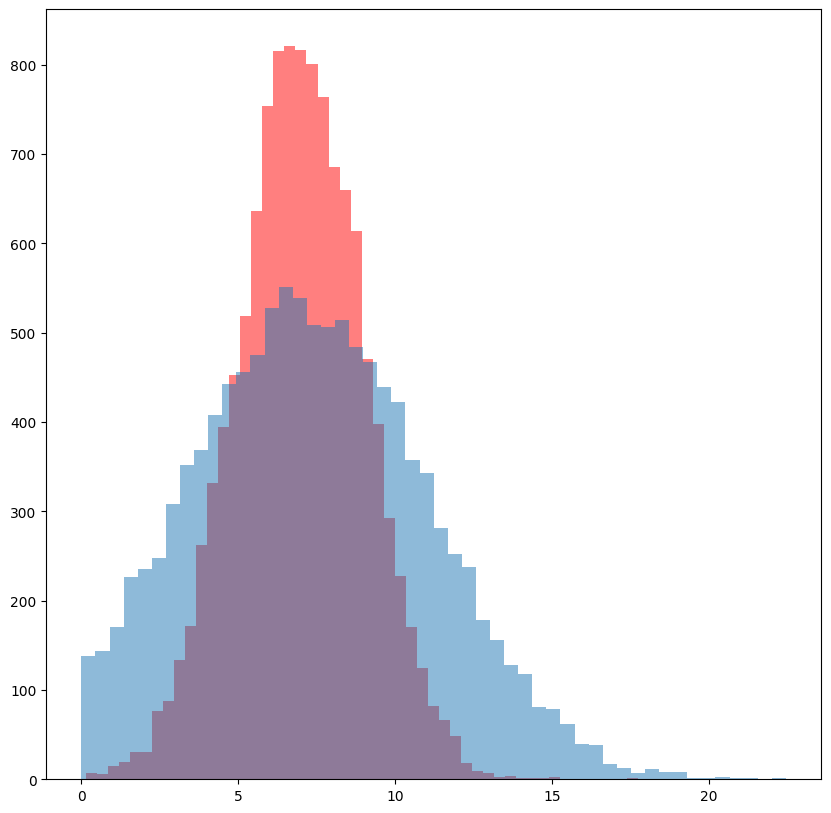

In [19]:
plt.figure(figsize=(10, 10))
control_visit_all = group_a['av_site visit']
test_visit_all = group_b['av_site visit']

plt.hist(control_visit_all, color='r', bins=50, alpha = 0.5)
plt.hist(test_visit_all, bins=50, alpha = 0.5)

In [20]:
stats.ttest_ind(control_visit_all, test_visit_all, equal_var = False)

TtestResult(statistic=-10.957295422202266, pvalue=7.54812855183956e-28, df=17530.29639618072)

In [21]:
control_visit_all

0         9.040174
1         4.811628
2         7.342623
3         7.744581
4        10.511814
           ...    
11830     7.381192
11831     9.583301
11832     7.290102
11833     6.458344
11834     9.131360
Name: av_site visit, Length: 11829, dtype: float64

In [22]:
control_visit_all.mean()

6.980379496709522

In [23]:
test_visit_all.mean()

7.404806266947357

In [24]:
k1 = group_a.purchase.sum()
k2 = group_b.purchase.sum()
n1 = group_a.shape[0]
n2 = group_b.shape[0]

In [25]:
k1,k2,n1,n2

(256, 224, 11829, 11355)

In [29]:
from statsmodels.stats import proportion
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]),
np.array([n1, n2]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =1.048, pvalue = 0.306


In [ ]:
mw_stats = stats.mannwhitneyu(x = group_a.num_purchases.values, y = group_b.num_purchases.values)

mw_stats